# 1. Data Preparation
 1.1 Load data \
 1.2 Add a penalty info related columns \
 1.3 Filter dataframe \
 1.4 Update team info frame with power play and penalty kill count

In [1]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Rotman MMA Summer Datathon NWHL.csv')
df_game_info = pd.read_csv('data/game_info.csv', sep="\t")
df_event_info = pd.read_csv('data/event_info.csv', sep="\t")
df_player_info = pd.read_csv('data/player_info.csv', sep="\t")
df_team_info = pd.read_csv('data/team_info.csv', sep="\t")


In [3]:
df_team_info.head()

,Team_Name,num_home_game,num_away_game,num_game
0,Boston Pride,2,5,7
1,Buffalo Beauts,4,2,6
2,Connecticut Whale,2,2,4
3,Metropolitan Riveters,2,1,3
4,Minnesota Whitecaps,1,3,4


In [4]:
len(df)

26882

In [5]:
df.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [6]:
# add a penalty_period column to distinguish different penalty periods
df["penalty_period"] = np.where(df["Event"]=="Penalty Taken", 1, 0)
df["penalty_period"] = df["penalty_period"].cumsum()

In [7]:
df.query("Event == 'Penalty Taken'")

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,penalty_period
210,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:48,5,5,0,0,Minnesota Whitecaps,...,83,46,Tripping,NaN,NaN,NaN,Taylor Wenczkowski,NaN,NaN,1
295,2021-01-23,Minnesota Whitecaps,Boston Pride,1,9:57,5,5,0,0,Minnesota Whitecaps,...,10,12,Roughing,NaN,NaN,NaN,Carlee Turner,NaN,NaN,2
458,2021-01-23,Minnesota Whitecaps,Boston Pride,1,4:18,5,5,1,1,Minnesota Whitecaps,...,5,30,Hooking,NaN,NaN,NaN,Meghara McManus,NaN,NaN,3
503,2021-01-23,Minnesota Whitecaps,Boston Pride,1,2:15,5,5,1,1,Boston Pride,...,162,83,Interference,NaN,NaN,NaN,NaN,NaN,NaN,4
682,2021-01-23,Minnesota Whitecaps,Boston Pride,2,15:30,5,5,1,1,Minnesota Whitecaps,...,94,5,Hooking,NaN,NaN,NaN,Tereza Vanisova,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26442,2021-02-01,Buffalo Beauts,Boston Pride,3,17:12,5,5,1,4,Boston Pride,...,190,64,Tripping,NaN,NaN,NaN,Whitney Dove,NaN,NaN,140
26582,2021-02-01,Buffalo Beauts,Boston Pride,3,11:27,5,5,1,5,Buffalo Beauts,...,84,67,Tripping,NaN,NaN,NaN,Meghara McManus,NaN,NaN,141
26619,2021-02-01,Buffalo Beauts,Boston Pride,3,9:55,5,5,1,6,Boston Pride,...,137,84,Holding,NaN,NaN,NaN,Autumn MacDougall,NaN,NaN,142
26706,2021-02-01,Buffalo Beauts,Boston Pride,3,6:27,5,5,1,7,Buffalo Beauts,...,151,82,Interference,NaN,NaN,NaN,Taylor Wenczkowski,NaN,NaN,143


In [8]:
# choose power play / penalty kill moment by compare the number of players on the court
df = df[df["Home Team Skaters"] != df["Away Team Skaters"]]

In [9]:
# change column names for sql
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [10]:
len(df)

5898

In [11]:
df.head(5)

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,X_Coordinate,Y_Coordinate,Detail_1,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2,penalty_period
211,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:48,4,5,0,0,Boston Pride,...,169,65,Forehand,NaN,NaN,NaN,Jonna Curtis,NaN,NaN,1
212,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:47,4,5,0,0,Boston Pride,...,144,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
213,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:45,4,5,0,0,Boston Pride,...,130,83,Direct,NaN,NaN,NaN,Lauren Kelly,131.0,59.0,1
214,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:43,4,5,0,0,Boston Pride,...,136,32,Direct,NaN,NaN,NaN,Taylor Turnquist,159.0,4.0,1
215,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:39,4,5,0,0,Boston Pride,...,162,2,Direct,NaN,NaN,NaN,Lauren Kelly,129.0,49.0,1


In [12]:
# add a column "is_power_play_event" to indicate whether the event happening belongs to a power play or penalty kill
# 1 for power play, 
# 0 for penalty kill
df['is_power_play_event'] = np.where(
    ((df['Home_Team'] == df['Team']) & (df["Home_Team_Skaters"] > df["Away_Team_Skaters"])) | 
    ((df['Away_Team'] == df['Team']) & (df["Home_Team_Skaters"] < df["Away_Team_Skaters"])), 
    1, 0)

In [13]:
# add two columns to indicate which team is in power play
df["Power_Play_Team"] = np.where(df["Home_Team_Skaters"] > df["Away_Team_Skaters"], df["Home_Team"], df["Away_Team"])
df["Penalty_Kill_Team"] = np.where(df["Home_Team_Skaters"] > df["Away_Team_Skaters"], df["Away_Team"], df["Home_Team"])


In [14]:
df.tail()

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2,penalty_period,is_power_play_event,Power_Play_Team,Penalty_Kill_Team
26877,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,NaN,NaN,NaN,144,0,Boston Pride,Buffalo Beauts
26878,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0,144,0,Boston Pride,Buffalo Beauts
26879,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,NaN,NaN,NaN,144,0,Boston Pride,Buffalo Beauts
26880,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,NaN,NaN,NaN,NaN,NaN,NaN,144,1,Boston Pride,Buffalo Beauts
26881,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,NaN,NaN,NaN,Lexie Laing,155.0,6.0,144,1,Boston Pride,Buffalo Beauts


In [15]:
# count the number of power play and penalty kill period for each team
df_power_play_count = df.groupby("Power_Play_Team").penalty_period.nunique().reset_index().rename(columns={"penalty_period": "power_play_count"})
df_penalty_count = df.groupby("Penalty_Kill_Team").penalty_period.nunique().reset_index().rename(columns={"penalty_period": "penalty_kill_count"})


In [16]:
df_power_play_count

,Power_Play_Team,power_play_count
0,Boston Pride,47
1,Buffalo Beauts,22
2,Connecticut Whale,12
3,Metropolitan Riveters,12
4,Minnesota Whitecaps,22
5,Toronto Six,32


In [17]:
# update team info frame with power play and penalty kill count
df_team_info = pd.merge(df_team_info, df_power_play_count, left_on="Team_Name", right_on="Power_Play_Team", )
df_team_info = pd.merge(df_team_info, df_penalty_count, left_on="Team_Name", right_on="Penalty_Kill_Team", )
df_team_info = df_team_info[["Team_Name", "num_home_game", "num_away_game", "num_game", "power_play_count", "penalty_kill_count"]]
df_team_info

,Team_Name,num_home_game,num_away_game,num_game,power_play_count,penalty_kill_count
0,Boston Pride,2,5,7,47,27
1,Buffalo Beauts,4,2,6,22,30
2,Connecticut Whale,2,2,4,12,19
3,Metropolitan Riveters,2,1,3,12,13
4,Minnesota Whitecaps,1,3,4,22,25
5,Toronto Six,4,2,6,32,33


# 2. Find Penalty Kill Specialists
 The key skills for a penalty killer are takeaways and precise passes. 

### 2.1 Find the players with most takeaways in penalty kill
<ol>
  <li>in total</li>
  <li>per game </li>
  <li>per penalty kill</li>
</ol>
   
   
   

In [18]:
df_penalty_kill = df[df['is_power_play_event'] == 0]

In [19]:
df_penalty_kill_takeaways = df_penalty_kill[df_penalty_kill['Event'] == 'Takeaway']

In [20]:
len(df_penalty_kill_takeaways)

124

In [21]:
# count the number of takeaways for each player in the penalty kill
df_penalty_kill_takeaways_count = df_penalty_kill_takeaways["Player"].groupby(df_penalty_kill_takeaways["Player"]).count().sort_values(ascending=False).reset_index(name="takeaway_count")

In [22]:
df_penalty_kill_takeaways_count.head()

,Player,takeaway_count
0,Meghara McManus,8
1,Taylor Woods,7
2,Natalie Marcuzzi,5
3,Sydney Baldwin,5
4,Taylor Turnquist,4


In [23]:
df_player_info.head()

,Team,Player,num_game
0,Boston Pride,Jillian Dempsey,7
1,Boston Pride,McKenna Brand,7
2,Boston Pride,Tereza Vanisova,7
3,Boston Pride,Samantha Davis,7
4,Minnesota Whitecaps,Stephanie Anderson,4


In [24]:
df_player_info.query("Player == 'Taylor Woods'")

,Team,Player,num_game
94,Toronto Six,Taylor Woods,6


In [25]:
df_team_info.head()

,Team_Name,num_home_game,num_away_game,num_game,power_play_count,penalty_kill_count
0,Boston Pride,2,5,7,47,27
1,Buffalo Beauts,4,2,6,22,30
2,Connecticut Whale,2,2,4,12,19
3,Metropolitan Riveters,2,1,3,12,13
4,Minnesota Whitecaps,1,3,4,22,25


In [26]:
# join the three tables above to figure out the takeaway stats of each player in penalty kill

df_penalty_kill_takeaways_player_stats = pd.merge(df_penalty_kill_takeaways_count, df_player_info, on="Player")
df_penalty_kill_takeaways_player_stats = pd.merge(df_penalty_kill_takeaways_player_stats, df_team_info, left_on="Team", right_on="Team_Name")
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats.assign(takeaway_per_game = lambda x: x["takeaway_count"] / x["num_game_x"],
                                                                                       takeaway_per_penalty_kill = lambda x: x["takeaway_count"] / x["penalty_kill_count"])
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats.round(2)



In [27]:
df_penalty_kill_takeaways_player_stats = df_penalty_kill_takeaways_player_stats[["Player", "Team", "takeaway_count", "num_game_x", "takeaway_per_game", "penalty_kill_count", "takeaway_per_penalty_kill"]]
df_penalty_kill_takeaways_player_stats.sort_values(by="takeaway_per_penalty_kill", ascending=True, inplace=True)
df_top = df_penalty_kill_takeaways_player_stats[-20:]


In [ ]:
# Visualize the result

def add_value_labels(ax, spacing=2):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for i, rect in enumerate(ax.patches):
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            color=colors[i],            # set color
            va=va,)                     # Vertically align label differently for
                                        # positive and negative values.

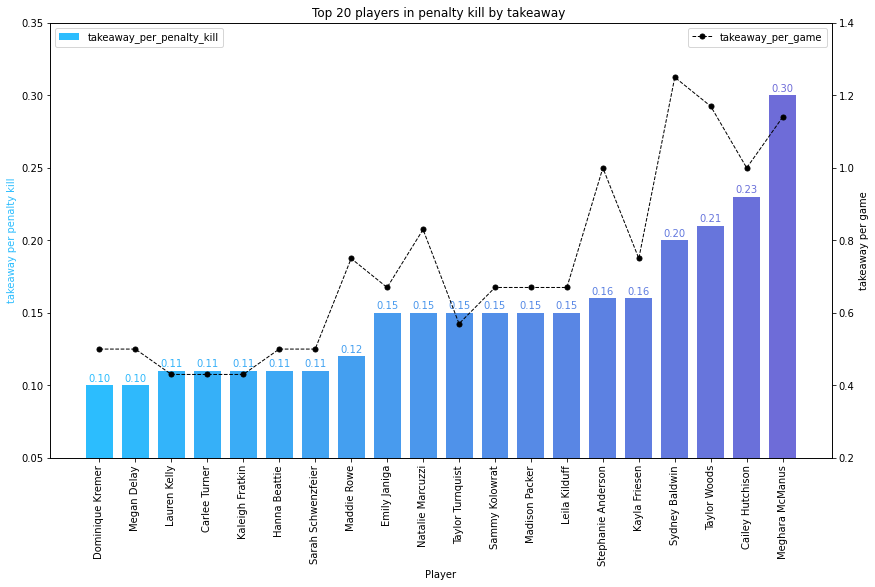

In [89]:
#A list of hex colours running between blue and purpleCB91_Grad_BP 
colors = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',                
        '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',                
        '#489bee', '#4b97ec', '#4f92ea', '#528ee8',                
        '#568ae6', '#5986e4', '#5c81e2', '#607de0',                
        '#6379de', '#6775dc', '#6a70da', '#6e6cd8',                
        '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',                
        '#7f57cf', '#8353cd', '#864ecb', '#894ac9',                
        '#8d46c7', '#9042c5', '#943dc3', '#9739c1',                
        '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',                
        '#a924b7', '#ac20b5', '#b01bb3', '#b317b1'] 

fig, ax1 = plt.subplots(figsize=(14,8))

X_axis = np.arange(len(df_top))
p1 = ax1.bar(x=X_axis, height=df_top["takeaway_per_penalty_kill"], color=colors, width=0.75, label="takeaway_per_penalty_kill")
ax1.set_xlabel('Player')
ax1.set_ylabel('takeaway per penalty kill', color='#2cbdfe')
ax1.set_xticks(X_axis, df_top['Player'], rotation=90)
ax1.set_ylim(0.05, 0.35)

add_value_labels(ax1)
ax1.legend(loc='upper left')

ax2 = plt.twinx()
ax2.plot(X_axis, df_top["takeaway_per_game"], color='k', linestyle='--', marker='o', linewidth=1, markersize=5, label="takeaway_per_game")
ax2.set_ylabel("takeaway per game", color='k')
ax2.set_xticks(X_axis, df_top['Player'], rotation=90)
ax2.set_ylim(0.2, 1.4)
# for a, b in zip(X_axis, df_top["takeaway_per_game"]):
#         plt.text(a, b-0.05, '%.2f' % b, ha='center', va='bottom', fontsize=10)

ax2.legend(loc='upper right')

plt.title("Top 20 players in penalty kill by takeaway ")
plt.show()